# Descripción de Datos
 A continuación se muestra el contenido de los CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
 


In [7]:
#Cargamos la librerias

import math
#analisis de datos 
import pandas as pd
import numpy as np
#visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
#estadistica 
from scipy import stats as st 
from scipy.stats import ttest_ind

In [8]:
#cargamos los archivos de datos Dataframe

companies_df = pd.read_csv('/datasets/project_sql_result_01.csv')

neighborhoods_df = pd.read_csv('/datasets/project_sql_result_04.csv')

# Revisión inicial de datos

In [9]:
# mostramos información del DataFrame usando info y revisamos algunas filas con .head()

#companies
print(companies_df.head())
print ( )
print(companies_df.info())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


In [10]:
# mostramos información del DataFrame usando info y revisamos algunas filas con .head()

#neighborhoods
print(neighborhoods_df.head())
print ( )
print(neighborhoods_df.info())


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [11]:
#Nos aseguramos que los tipos de datos sean los correctos

companies_df['company_name'] = companies_df['company_name'].astype('string')
companies_df['trips_amount'] = pd.to_numeric(companies_df['trips_amount'], errors='coerce').fillna(0).astype(int)

neighborhoods_df['dropoff_location_name'] = neighborhoods_df['dropoff_location_name'].astype('string')
neighborhoods_df['average_trips'] = pd.to_numeric(neighborhoods_df['average_trips'], errors='coerce')


In [12]:
# mostramos información del DataFrame usando info para verificar los cambios
print(companies_df.info())
print(neighborhoods_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     string
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), string(1)
memory usage: 1.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     string 
 1   average_trips          94 non-null     float64
dtypes: float64(1), string(1)
memory usage: 1.6 KB
None


In [13]:
#comprobamos datos nulos

print(companies_df.isna().sum())
print(neighborhoods_df.isna().sum())


company_name    0
trips_amount    0
dtype: int64
dropoff_location_name    0
average_trips            0
dtype: int64


In [14]:
#identificamos los 10 principales barrios en términos de finalización de recorrido

top10_neighborhoods = neighborhoods_df.nlargest(10, 'average_trips').copy()
print(top10_neighborhoods[['dropoff_location_name', 'average_trips']])


  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


# GRÁFICOS

Top 10 por viajes:
                         company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


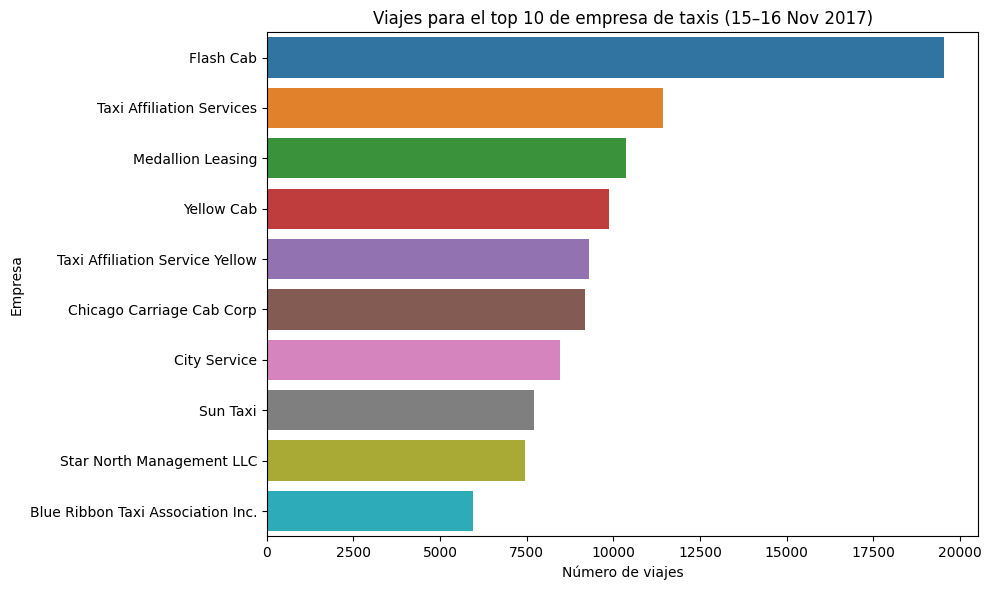

In [15]:
# 1) Empresas de taxis vs número de viajes (15-16 Nov 2017)

top5_companies = companies_df.nlargest(10, 'trips_amount')[['company_name','trips_amount']]
print('Top 10 por viajes:\n', top5_companies[['company_name','trips_amount']])

plt.figure(figsize=(10, 6))
companies_sorted = top5_companies.sort_values('trips_amount', ascending=False)
sns.barplot(data=companies_sorted, x='trips_amount', y='company_name')
plt.title('Viajes para el top 10 de empresa de taxis (15–16 Nov 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Empresa')
plt.tight_layout()
plt.show()

## Conclusiones

- La empresa Flash Cab domina claramente con 19,558 viajes.
- Taxi Affiliation Services ocupa el segundo lugar con 11,422 viajes y Medallion Leasing con 10.367 viajes. 
- Hay una gran diferencia entre las primeras tres empresas y el resto, con lo cual podemos suponer varias cosas, una la cantidad de vehiculos que tienen en circulación las empresas, la antiguedad en la operación y por ende el reconicimiento de la marca, o tambien podemos inferir que podrian tener acuerdos contractuales y/o mejores precios que le den mayor cobertura. 


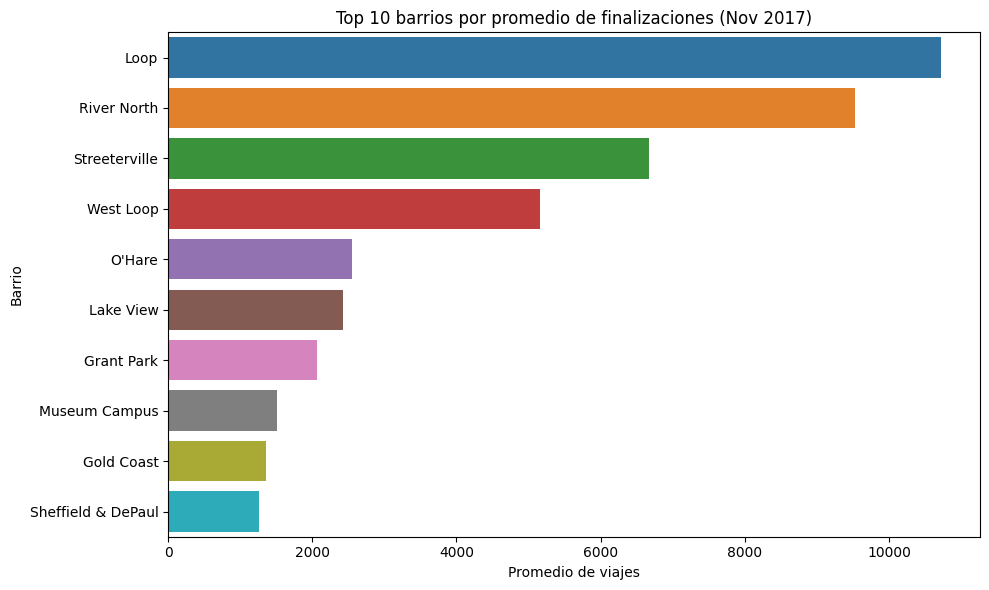

In [16]:
# 2) Top 10 barrios por finalizaciones (promedio Nov 2017)
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_neighborhoods.sort_values('average_trips', ascending=False),
            x='average_trips', y='dropoff_location_name')
plt.title('Top 10 barrios por promedio de finalizaciones (Nov 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()

## Conclusiones

- Loop es claramente el destino más popular con 10,727 viajes promedio.
- River North le sigue con 9,523 viajes. 
- Estos dos barrios están significativamente por encima del resto, los que puede significar que sean zonas de tipo comercial, con mayor centralización de mercado, como colegios, restaurantes, empresas, tiendas. 
- O'Hare (aeropuerto) aparece en 5to lugar, lo cual tiene sentido por ser un hub de transporte.

## PRUEBA DE HIPOTÉSIS

In [17]:
#cargamos los archivos de datos Dataframe

trips_df = pd.read_csv('/datasets/project_sql_result_07.csv', parse_dates=['start_ts'])

# mostramos información del DataFrame usando info y revisamos algunas filas con .head()

print(trips_df.info())
print()
print(trips_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None

             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good            2410.0
1 2017-11-25 14:00:00               Good            1920.0
2 2017-11-25 12:00:00               Good            1543.0
3 2017-11-04 10:00:00               Good            2512.0
4 2017-11-11 07:00:00               Good            1440.0


In [18]:
#Nos aseguramos que los tipos de datos sean los correctos

trips_df['weather_conditions'] = trips_df['weather_conditions'].astype('string')
trips_df['duration_seconds'] = pd.to_numeric(trips_df['duration_seconds'], errors='coerce')
print(trips_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   string        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), string(1)
memory usage: 25.2 KB
None


In [19]:
# Filtrar solo sábados teniendo en cuenta que la hipotesis consiste en "La duración promedio 
#de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

trips_df['dow'] = trips_df['start_ts'].dt.dayofweek  # 0=lunes ... 6=sábado
df_sat = trips_df[trips_df['dow'] == 5].copy()

In [20]:
# Clasificar grupos según las condiciones del clima
sat_bad = df_sat[df_sat['weather_conditions'] == 'Bad']['duration_seconds'].dropna()
sat_good = df_sat[df_sat['weather_conditions'] == 'Good']['duration_seconds'].dropna()

print('Bad:', sat_bad.size, 'n Good:', sat_good.size)
print('mean Bad:', sat_bad.mean(), 'mean Good:', sat_good.mean())
print('std Bad:', sat_bad.std(ddof=1), 'std Good:', sat_good.std(ddof=1))

Bad: 180 n Good: 888
mean Bad: 2427.2055555555557 mean Good: 1999.6756756756756
std Bad: 721.3141382244514 std Good: 759.1982677071313


## Formulación de prueba de hipótesis

- Hipótesis nula (H0): "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos".

- Hipótesis alternativa (H1): "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

- Nivel de significación: α = 0.05


In [22]:
alpha = 0.05

#95% de confianza
#aplicamos el t'test para determinar si hay una diferentencia estadistica significativa en la duración promedio
#de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sabados lluviosos.

# Comprobar que hay datos en ambos grupos
if sat_bad.size > 1 and sat_good.size > 1:
    t_statistic, p_value = st.ttest_ind(sat_bad, sat_good, equal_var=False)  # Welch's t-test
    print(f"Test Statistic:', {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Alpha value: {alpha}")
else:
    print('Insuficientes datos en uno de los grupos para ejecutar la prueba.')

if sat_bad.size > 1 and sat_good.size > 1:
    if p_value < alpha:
        print("Basados en el p-value, se rechaza la hipotesis nula.")
        print("Hay una diferencia significativa en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sabados lluviosos.")
    else:
        print("Basados en el p-value, no podemos rechazar la hipotesis nula.")
        print("No hay una diferencia significativa en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sabados lluviosos.")
    


Test Statistic:', 7.1860
P-value: 0.0000
Alpha value: 0.05
Basados en el p-value, se rechaza la hipotesis nula.
Hay una diferencia significativa en la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sabados lluviosos.


Teniendo en cuenta lo anterior indicamos que:

- Se cambia el sentido de la prueba de hipótesis planteada en el ejercicio, para preservar el enfoque conservador de la H0, en la cual se indica según la metodología, que nada cambia.
- El resultado arrojado, nos permite inferir que los cambios climaticos afectan e impactan los tiempos de recorrido hasta el aeropuerto, suponemos esto debido al trafico, disminución de velocidad por poca visibilidad, mayor accidentalidad.
- Es importante tener está información dado que permite a las empresas de transporte estar enterados y tomar acciones correspondientes, por ejemplo en la programación de los viajes a los distintos destinos, anticipando los tiempos estimados de recorridos a los usuarios y de esta manera generando mejor reconocimiento y recordación con el cliente. 